In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_eng = pd.read_csv("train.csv")

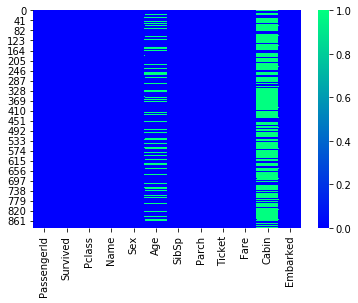

In [93]:
sns.heatmap(train.isnull(),cmap='winter')

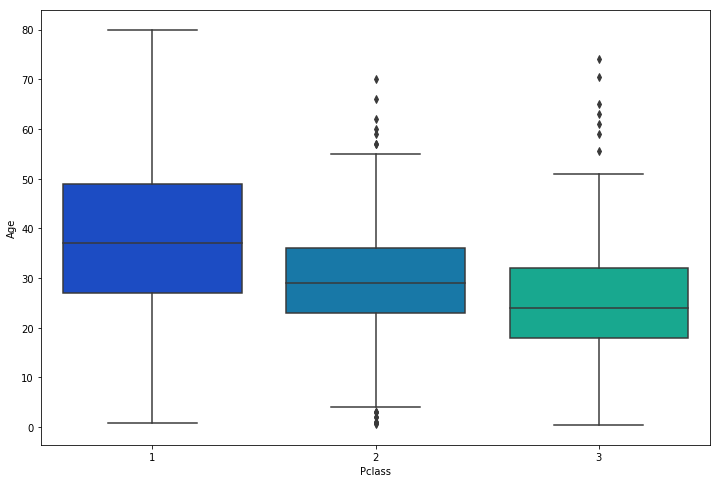

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [95]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [96]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

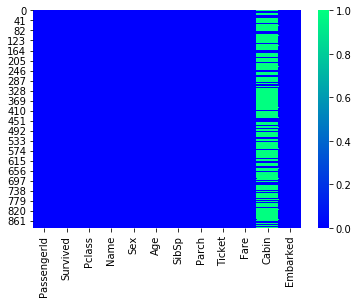

In [97]:
sns.heatmap(train.isnull(),cmap = 'winter')

In [98]:
train.drop('Cabin',axis = 1, inplace = True)

In [99]:
train.dropna(inplace = True)

In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [102]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [117]:
train = pd.concat([train,sex,embark],axis = 1)

In [118]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
predictions = logmodel.predict(X_test)

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
forest = RandomForestClassifier()

In [128]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
rf_preds = forest.predict(X_test)

In [130]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       163
           1       0.82      0.75      0.78       104

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



In [132]:
from xgboost import XGBClassifier

/home/cam/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [142]:
xgb_model = XGBClassifier(n_estimators = 500,learning_rate = .05)

In [143]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [144]:
xgb_preds = xgb_model.predict(X_test)

In [145]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       163
           1       0.76      0.71      0.73       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



# Feature Engineering

extract title? mr, mrs, etc

In [153]:
train_eng['Name'][0].split()[1]

'Mr.'

In [164]:
def get_title(s):
    title = str(s)
    return title.split()[2]

In [165]:
train_eng['Title'] = train_eng[['Name']].apply(get_title,axis=1)

train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

In [166]:
train_eng.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [167]:
train_eng['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [170]:
train_eng['Title'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Major.            2
Gordon,           2
Col.              2
Mlle.             2
the               1
Cruyssen,         1
Mme.              1
Mulder,           1
Pelsmaeker,       1
Jonkheer.         1
Messemaeker,      1
Capt.             1
Melkebeke,        1
Don.              1
Walle,            1
Carlo,            1
der               1
Shawah,           1
Steen,            1
Billiard,         1
Velde,            1
Ms.               1
Name: Title, dtype: int64

In [181]:
#train_eng[train_eng['Title'] != ['Mr.','Miss.','Mrs.','Master.','Dr.','Rev.']]
train_eng[train_eng['Title'] != 'Mr.']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,Mrs.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,Mrs.
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,Miss.
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,Miss.
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,Miss.
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,Mrs.


In [183]:
train_eng['Age'] = train_eng[['Age','Pclass']].apply(fill_age,axis=1)

In [187]:
train_eng.drop('Cabin',axis = 1, inplace = True)

In [193]:
train_eng.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,...,"Pelsmaeker,","Planke,",Rev.,"Shawah,","Steen,","Velde,","Walle,",der,the,y
0,1,0,3,22.0,1,0,7.2500,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [189]:
sex = pd.get_dummies(train_eng['Sex'],drop_first=True)
embark = pd.get_dummies(train_eng['Embarked'],drop_first=True)
title = pd.get_dummies(train_eng['Title'],drop_first = True)

In [191]:
train_eng.drop(['Sex','Embarked','Name','Ticket','Title'],axis=1,inplace=True)

In [192]:
train_eng = pd.concat([train_eng,sex,embark,title],axis=1)

In [194]:
train_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
male            891 non-null uint8
Q               891 non-null uint8
S               891 non-null uint8
Capt.           891 non-null uint8
Carlo,          891 non-null uint8
Col.            891 non-null uint8
Cruyssen,       891 non-null uint8
Don.            891 non-null uint8
Dr.             891 non-null uint8
Gordon,         891 non-null uint8
Impe,           891 non-null uint8
Jonkheer.       891 non-null uint8
Major.          891 non-null uint8
Master.         891 non-null uint8
Melkebeke,      891 non-null uint8
Messemaeker,    891 non-null uint8
Miss.           891 non-null uint8
Mlle.           891 non-null uint8
Mme.            

In [195]:
logmodel2 = LogisticRegression(solver = 'liblinear')
logmodel2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
predictions2 = logmodel2.predict(X_test)

In [197]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [198]:
forest2 = RandomForestClassifier()
forest2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [199]:
forest2_preds = forest2.predict(X_test)

In [201]:
print(classification_report(y_test,forest2_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       163
           1       0.80      0.75      0.77       104

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

